# Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
# from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn import metrics

from warnings import filterwarnings
filterwarnings('ignore')

**Infrormation about the data**

* flat products    168
* pipe               7
* products          55
* rod              104
* rod & bar          6
* shapes            50
* strip              6
* tube              54
* wire              65

# Inspect dataset

In [2]:
df = pd.read_csv("CopperData.csv")
df.head()

,Unnamed: 0,name,form,temper,temper_code,tensile_strength,thermal_conductivity,cu,pb,zn,...,be,cr,si,ti,ca,li,b,c,nb,se
0,0,C10100 Oxygen-Free-Electronic,products,1/2 Hard,H02,42.0,226.0,99.99,0.0005,0.0001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,C10100 Oxygen-Free-Electronic,products,1/4 Hard,H01,38.0,226.0,99.99,0.0005,0.0001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,C10100 Oxygen-Free-Electronic,products,1/8 Hard,H00,36.0,226.0,99.99,0.0005,0.0001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,C10100 Oxygen-Free-Electronic,products,As Hot Rolled,M20,34.0,226.0,99.99,0.0005,0.0001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,C10100 Oxygen-Free-Electronic,products,As Hot Rolled,M20,32.0,226.0,99.99,0.0005,0.0001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Drop columns with only zero values
for col in df:    
    unique_ele = df[col].unique()    
    if len(unique_ele) == 1 and unique_ele[0] == 0:
        print(col, df[col].unique())
        df = df.drop(col, axis=1)
print("Total number of columns =", len(df.columns))

Total number of columns = 37


In [4]:
form_dummies = pd.get_dummies(df['form']).drop('strip', axis=1)
temper_dummies = pd.get_dummies(df['temper_code']).drop('ANNEAL', axis=1)
# name_dummies = pd.get_dummies(df['name'].apply(lambda x: x.lower())).drop('c15150', axis=1)

# categorical_dummies = pd.concat([form_dummies, temper_dummies, name_dummies], axis=1)
categorical_dummies = pd.concat([form_dummies, temper_dummies], axis=1)
categorical_dummies.to_csv("categorical_one_hot_encoded.csv", index=False)

In [5]:
categorical_dummies

,as centrifugal cast,as sand cast,bar,die forging,flat products & rod,flat products & wire,"flat products, rod & bar",forgings,pipe,plate,...,TS01,TS02,TS03,TS04,TS08,TS10,TX00,WM04,WM10,WR02
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1825,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1826,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# df = df.iloc[:,1:]

In [23]:
df.iloc[:,6:]

,cu,pb,zn,fe,p,ag,as,o,sb,te,...,be,cr,si,ti,ca,li,b,c,nb,se
0,99.99,0.0005,0.0001,0.001,0.0003,0.0025,0.0005,0.0005,0.0004,0.0002,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,99.99,0.0005,0.0001,0.001,0.0003,0.0025,0.0005,0.0005,0.0004,0.0002,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,99.99,0.0005,0.0001,0.001,0.0003,0.0025,0.0005,0.0005,0.0004,0.0002,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,99.99,0.0005,0.0001,0.001,0.0003,0.0025,0.0005,0.0005,0.0004,0.0002,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,99.99,0.0005,0.0001,0.001,0.0003,0.0025,0.0005,0.0005,0.0004,0.0002,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,66.50,1.4000,26.0000,0.350,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1824,66.50,1.4000,26.0000,0.350,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1825,99.90,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1826,61.00,1.2500,36.0000,0.700,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
composition_features = df.iloc[:,6:]

target_features = df[['tensile_strength', 'thermal_conductivity']]

In [26]:
pd.concat([X, y], axis=1).to_csv("Copper Dataset (version 4.0).csv", index=False)
# pd.concat([X, y], axis=1).shape

In [25]:
X = pd.concat([categorical_dummies, composition_features], axis=1)
y = target_features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.193, random_state=327)

print("Number of train set elements = ", y_train.shape[0])
print("Number of test set elements = ", y_test.shape[0])

Number of train set elements =  1475
Number of test set elements =  353


In [15]:
# Read dataset
data = pd.read_csv("Copper Dataset (version 4.0).csv")

# Remove duplicate columns
tc_data = data.iloc[:,-30:].drop('tensile_strength', axis=1)  # Subset of relevant features and labels
tc_data = tc_data[~tc_data.duplicated(keep='first')]  # Remove duplicates

# Split into features and target variables
X = tc_data.iloc[:,:-1]
y = tc_data['thermal_conductivity']

# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
X_train.shape

(193, 28)

In [8]:
# Names of models
model_labels = ['LinearRegression',
          'Lasso',
          'Ridge',
          'DecisionTreeRegressor',
          'KNeighborsRegressor',
          'MLPRegressor',
          'RandomForestRegressor',
#           'XGBRegressor',
#           'XGBRFRegressor', 
          'SVR', 
          'AdaBoostRegressor'            
         ]

# Regression Models with default hyper-parameters
models = [LinearRegression(),
          Lasso(alpha=0.001),
          Ridge(),
          DecisionTreeRegressor(),
          KNeighborsRegressor(weights='distance'),
          MLPRegressor(random_state=42, max_iter=2000),
          RandomForestRegressor(),
#           XGBRegressor(objective='reg:squarederror'),
#           XGBRFRegressor(objective='reg:squarederror', learning_rate=1), 
          SVR(), 
          AdaBoostRegressor()
         ]

r2_scores = []
mse_scores = []
mae_scores = []

for i, (model, name) in enumerate(zip(models, model_labels)):
    
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    
#     print
    
    r2_scores.append(metrics.r2_score(y_train, y_pred))
    mse_scores.append(metrics.mean_squared_error(y_train, y_pred))
    mae_scores.append(metrics.mean_absolute_error(y_train, y_pred))   
    print(name + " done")

LinearRegression
LinearRegression done
Lasso
Lasso done
Ridge
Ridge done
DecisionTreeRegressor
DecisionTreeRegressor done
KNeighborsRegressor
KNeighborsRegressor done
MLPRegressor
MLPRegressor done
RandomForestRegressor
RandomForestRegressor done
SVR
SVR done
AdaBoostRegressor
AdaBoostRegressor done


In [9]:
training_scores = pd.DataFrame({"model" : model_labels,
                                "R-squared": r2_scores, 
                                "MSE" : mse_scores, 
                                "MAE" : mae_scores}).sort_values(by=['R-squared'], ascending=False)
training_scores

,model,R-squared,MSE,MAE
3,DecisionTreeRegressor,0.984371,65.665155,1.898705
4,KNeighborsRegressor,0.984371,65.665155,1.898705
6,RandomForestRegressor,0.955762,185.870664,8.426658
5,MLPRegressor,0.824147,738.859628,18.346006
8,AdaBoostRegressor,0.810438,796.456787,23.859666
0,LinearRegression,0.729739,1135.520494,26.608708
1,Lasso,0.729628,1135.986088,26.610794
2,Ridge,0.706873,1231.593195,28.021516
7,SVR,0.274745,3047.208059,42.646761


In [12]:
def model_and_evaluate(mode, plot=False):
    # Names of models
    model_labels = [
#         'LinearRegression',
          'Lasso',
          'Ridge',
          'DecisionTreeRegressor',
          'KNeighborsRegressor',
          'MLPRegressor',
          'RandomForestRegressor',
#           'XGBRegressor',
#           'XGBRFRegressor', 
          'SVR', 
          'AdaBoostRegressor'            
         ]

    # Regression Models with default hyper-parameters
    models = [
#         LinearRegression(normalize=True),
          Lasso(alpha=0.001),
          Ridge(),
          DecisionTreeRegressor(),
          KNeighborsRegressor(weights='distance'),
          MLPRegressor(random_state=42, max_iter=2000),
          RandomForestRegressor(),
#           XGBRegressor(objective='reg:squarederror'),
#           XGBRFRegressor(objective='reg:squarederror', learning_rate=1), 
          SVR(), 
          AdaBoostRegressor()
    ]

    r2_scores = []
    mse_scores = []
    mae_scores = []

    for i, (model, name) in enumerate(zip(models, model_labels)):

        model.fit(X_train, y_train)
        
        if mode == 'train':
            y_pred = model.predict(X_train)
            evaluation = y_train
#             print("On Training Data")
        elif mode == 'test':
            y_pred = model.predict(X_test)
            evaluation = y_test
#             print("On Testing Data")


        r2_scores.append(round(metrics.r2_score(evaluation, y_pred), 4))
        mse_scores.append(metrics.mean_squared_error(evaluation, y_pred))
        mae_scores.append(metrics.mean_absolute_error(evaluation, y_pred))  
        
        if plot:
            plt.scatter(evaluation, y_pred)
            plt.xlabel("True Labels")
            plt.ylabel("Predictions")
            plt.title(name)
            plt.show()
        
    evaluation_df = pd.DataFrame({"model" : model_labels,
                                  "R-squared": r2_scores, 
                                  "MSE" : mse_scores, 
                                  "MAE" : mae_scores}).sort_values(by=['R-squared'], ascending=False)
    
    
    
    return evaluation_df.reset_index(drop=True).set_index('model')

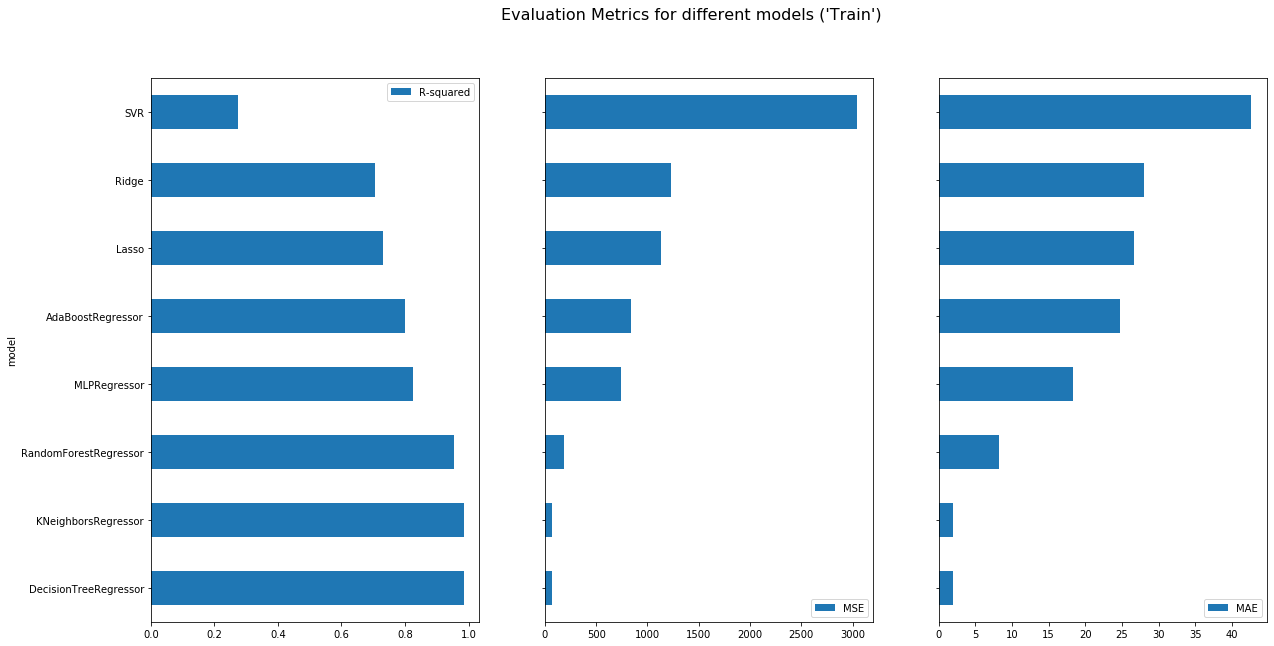

In [13]:
train_eval = model_and_evaluate('train')
fig, ax = plt.subplots(1, 3, figsize=(20,10), sharey=True)

for i, col in enumerate(train_eval.columns):
    train_eval[[col]].plot(kind='barh', ax=ax[i])

fig.suptitle("Evaluation Metrics for different models ('Train')", fontsize=16)
# fig.tight_layout()
plt.show()

In [16]:
test_eval = model_and_evaluate('test')

# fig, ax = plt.subplots(1, 3, figsize=(20,10), sharey=True)

# for i, col in enumerate(test_eval.columns):
#     test_eval[[col]].plot(kind='barh', ax=ax[i])

# fig.suptitle("Evaluation Metrics for different models (Test Data)", fontsize=16)
# plt.show()
test_eval

,R-squared,MSE,MAE
model,,,
KNeighborsRegressor,0.9494,247.887621,11.321904
RandomForestRegressor,0.9079,451.753253,17.194299
DecisionTreeRegressor,0.8585,693.601173,16.502727
MLPRegressor,0.8397,786.130338,23.775964
Lasso,0.7672,1141.411828,28.965508
Ridge,0.7533,1209.405288,30.389834
AdaBoostRegressor,0.6151,1887.042015,37.092784
SVR,0.2307,3771.920528,51.666589


In [ ]:
# r2_scores = []
# mse_scores = []
# mae_scores = []

# for i in np.logspace(-5,10, 15):
    
#     model = SVR(C=i)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_train)

#     r2_scores.append(metrics.r2_score(y_train, y_pred))
#     mse_scores.append(metrics.mean_squared_error(y_train, y_pred))
#     mae_scores.append(metrics.mean_absolute_error(y_train, y_pred))   
    
# pd.DataFrame({"SVR learning rate" : np.logspace(-5,10, 15),
#               "R-squared": r2_scores, 
#               "MSE" : mse_scores, 
#               "MAE" : mae_scores}).sort_values(by=['R-squared'], ascending=False)

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

feature_importance_df = pd.DataFrame({'feature':X_train.columns, 
                                      'rf_importance': model.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by=['rf_importance'], ascending=False)
feature_importance_df = feature_importance_df.set_index('feature', drop=True)

feature_importance_df = feature_importance_df[feature_importance_df['rf_importance'] > 0.01]
fig, ax = plt.subplots(figsize=(20,10))
feature_importance_df.plot(kind='bar', ax=ax)
ax.tick_params(axis='both', which='major', labelsize=16)
fig.tight_layout()
plt.show()

In [ ]:
X = X[feature_importance_df.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.193, random_state=327)

print("Number of train set elements = ", y_train.shape[0])
print("Number of test set elements = ", y_test.shape[0])



In [ ]:
train_eval = model_and_evaluate('train')
fig, ax = plt.subplots(1, 3, figsize=(20,10), sharey=True)

for i, col in enumerate(train_eval.columns):
    train_eval[[col]].plot(kind='barh', ax=ax[i])

fig.suptitle("Evaluation Metrics for different models", fontsize=16)
# fig.tight_layout()
plt.show()

In [ ]:
test_eval = model_and_evaluate('test')

fig, ax = plt.subplots(1, 3, figsize=(20,10), sharey=True)

for i, col in enumerate(test_eval.columns):
    test_eval[[col]].plot(kind='barh', ax=ax[i])

fig.suptitle("Evaluation Metrics for different models (Test Data)", fontsize=16)
plt.show()

In [ ]:
test_eval

In [27]:
pd.read_csv("Copper Dataset (version 4.0).csv")

,as centrifugal cast,as sand cast,bar,die forging,flat products & rod,flat products & wire,"flat products, rod & bar",forgings,pipe,plate,...,si,ti,ca,li,b,c,nb,se,tensile_strength,thermal_conductivity
0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,226.0
1,0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,226.0
2,0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,226.0
3,0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,226.0
4,0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,27.0
1824,0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,23.0
1825,1,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,226.0
1826,1,0,0,0,0,0,0,0,0,0,...,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,48.5
